              precision    recall  f1-score   support

       False       0.78      0.91      0.84      1533
        True       0.38      0.18      0.25       467

    accuracy                           0.74      2000
   macro avg       0.58      0.55      0.54      2000
weighted avg       0.69      0.74      0.70      2000



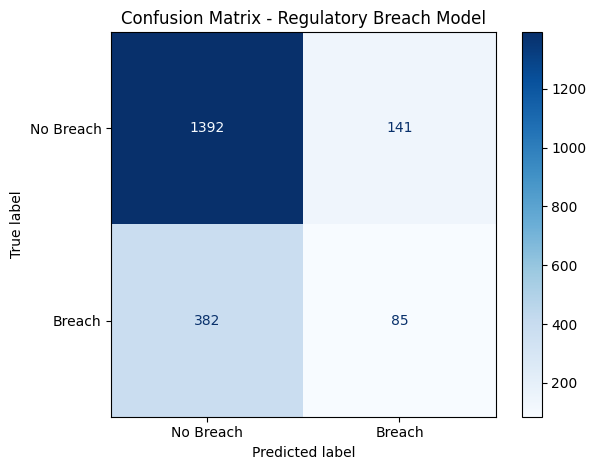

['trained_model.pkl']

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

# Load data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix (using built-in sklearn, no seaborn needed)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Breach", "Breach"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Regulatory Breach Model")
plt.tight_layout()
plt.show()

# Save model
joblib.dump(model, "trained_model.pkl")